In [1]:
from tensorflow.keras.models import load_model

# Untuk memuat kembali model
model = load_model('model_tubesML_terbaik.h5')

1/1 [==============================] - 0s 283ms/step
[[1.6483493e-04 2.9028893e-01 7.0954627e-01]]


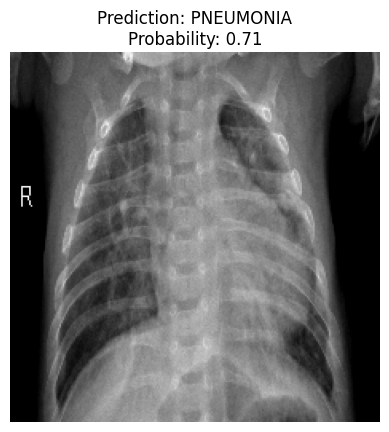

Image Path: C:/Alvito/UNPAD/SEMESTER 7/Machine Learning aweu/Tubes_ML/Chest X-Ray/validation/PNEUMONIA/PNEUMONIA_9.png


In [2]:
import tkinter as tk
from tkinter import filedialog
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Function to predict an uploaded image
def predict_uploaded_image(model):
    file_path = filedialog.askopenfilename()
    if file_path:
        predict_image(model, file_path)
        print("Image Path:", file_path)

# Function to predict an image given its path
def predict_image(model, image_path):
    labels = ['COVID', 'NORMAL', 'PNEUMONIA']

    img = image.load_img(image_path, target_size=(150, 150))
    img = image.img_to_array(img)
    img = img / 255.0

    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)
    print(prediction)

    predicted_class = labels[np.argmax(prediction)]
    predicted_probability = np.max(prediction)

    plt.figure()
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.title(f'Prediction: {predicted_class}\nProbability: {predicted_probability:.2f}')
    plt.axis('off')
    plt.show()
    # Close the root window after displaying the image and prediction
    root.destroy()

# Create Tkinter GUI
root = tk.Tk()
root.title("Image Prediction")

# Function to trigger image upload and prediction
def on_button_click():
    predict_uploaded_image(model)  # Replace 'loaded_model' with your model variable

# Create a button to upload the image
button = tk.Button(root, text="Upload Image", command=on_button_click)
button.pack()

# Run the Tkinter main loop
root.mainloop()
